<a href="https://colab.research.google.com/github/Utsuk7/Credit_Card_Customer_Churn/blob/main/Credit_card_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r"/content/Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

KeyError: "['RowNumber', 'CustomerId', 'Surname'] not found in axis"

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Exited'])
y=df['Exited']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scale=sc.fit_transform(X_train)
X_test_scale=sc.fit_transform(X_test)

In [ ]:
X_train_scale

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scale,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.8093 - accuracy: 0.4377 - val_loss: 0.5609 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5120 - accuracy: 0.7972 - val_loss: 0.4884 - val_accuracy: 0.7975
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7972 - val_loss: 0.4756 - val_accuracy: 0.7975
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.7972 - val_loss: 0.4661 - val_accuracy: 0.7975
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.7972 - val_loss: 0.4577 - val_accuracy: 0.7975
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4503 - accuracy: 0.7972 - val_loss: 0.4501 - val_accuracy: 0.7975
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.7972 - val_loss: 0.4435 - val_accuracy: 0.7975

In [ ]:
model.layers[1].get_weights()

[array([[-1.55341768e+00,  6.95148483e-03,  9.35313523e-01,
          5.43152273e-01,  1.54622948e+00,  1.32066894e+00,
         -1.11399627e+00,  8.02733719e-01,  8.82178187e-01,
         -1.20060933e+00,  1.15310812e+00],
        [-4.42246199e-01, -6.76574171e-01,  8.35598469e-01,
          7.06358790e-01,  7.95019150e-01,  6.57263219e-01,
         -7.21162915e-01,  1.03589082e+00,  1.04268909e+00,
         -8.93696666e-01,  8.81757915e-01],
        [ 3.24745476e-01,  9.77255311e-03, -1.85776412e-01,
         -6.91466406e-02, -4.43130344e-01, -5.58030084e-02,
          3.49291354e-01,  1.76106229e-01,  1.00448385e-01,
          2.53609955e-01, -2.63625711e-01],
        [ 1.50933194e+00,  1.02978253e+00, -8.47199380e-01,
         -6.39634848e-01, -9.21328664e-01, -1.17886782e-01,
          6.89281583e-01, -1.10698581e+00, -3.51967603e-01,
          4.07693058e-01, -8.79867256e-01],
        [-1.18484807e+00, -6.45778835e-01,  9.11475241e-01,
          7.60131001e-01,  6.46407425e-01,  

In [ ]:
y_log= model.predict(X_test_scale)

63/63 [==============================] - 0s 1ms/step


In [ ]:
y_pred=np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.8625


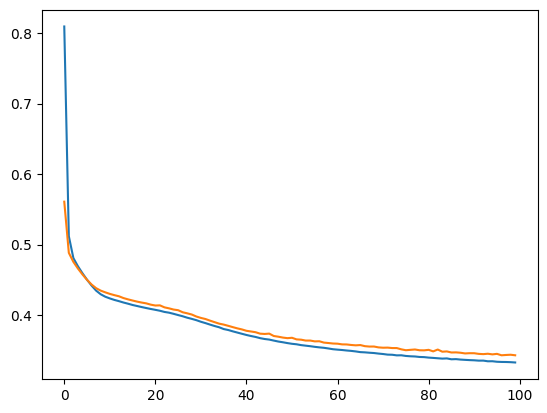

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

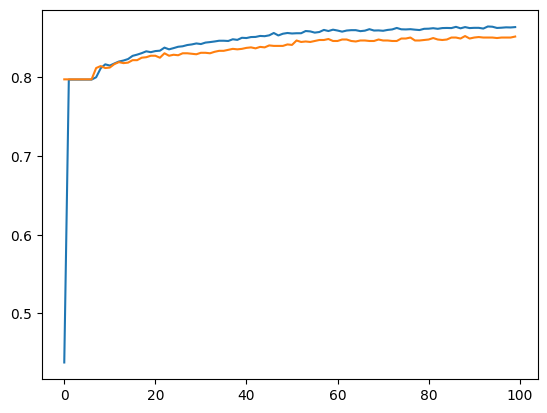

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])